In [1]:
!pip install transformers
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from datetime import datetime

# Mini-project 1

Apply Transformers & its variants for a text classification problem.

## Problem statement
- Given a set of Transformers variants and a text classification dataset. Your task is to make a complete pipeline from input to output.
- Your pipeline **SHOULD** include the following required components. Each component **SHOULD** be organized into different `class` object.
    - Load & discover dataset
    - Preprocess data
    - Tokenize data
    - Create a DataLoader
    - Build or load model
    - Create a training workflow
    - Set up hyperparameters for training procedure
    - Train model
    - Evaluate model
    - Infer model


## Dataset demonstration
In this project, we would conduct classification on [IMDb dataset](https://ai.stanford.edu/~amaas/data/sentiment/), which is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. This dataset provides a set of 25 000 highly polar movie reviews for training, and 25 000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

In [ ]:
from datasets import load_dataset

In [ ]:
imdb_dataset = load_dataset("stanfordnlp/imdb")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

### Train set

In [ ]:
imdb_train_set = imdb_dataset["train"]
imdb_train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
len(imdb_train_set[0]['text'])

1640

### Test set

In [ ]:
imdb_test_set = imdb_dataset["test"]
imdb_test_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
imdb_test_set[0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

## List of models for this project

In [ ]:
import torch
from torch import nn

### BERT
- BERT is a deep learning language model designed to improve the efficiency of natural language processing (NLP) tasks. It is famous for its ability to consider context by analyzing the relationships between words in a sentence bidirectionally. It was introduced by Google researchers in a 2018 paper titled “BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.” Since then, the BERT model has been fine-tuned for use in a variety of fields, including biology, data science, and medicine.

- You could discover [BERT documentation](https://huggingface.co/docs/transformers/en/model_doc/bert) from transformers library @ Huggingface for more details.

- Examples of training use case for Huggingface model: [Huggingface training](https://huggingface.co/docs/transformers/en/training)

In [ ]:
from transformers import (
    BertForSequenceClassification,
    BertTokenizer
)

In [ ]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
tokenizer(imdb_train_set[0]['text'])

{'input_ids': [101, 1045, 12524, 1045, 2572, 8025, 1011, 3756, 2013, 2026, 2678, 3573, 2138, 1997, 2035, 1996, 6704, 2008, 5129, 2009, 2043, 2009, 2001, 2034, 2207, 1999, 3476, 1012, 1045, 2036, 2657, 2008, 2012, 2034, 2009, 2001, 8243, 2011, 1057, 1012, 1055, 1012, 8205, 2065, 2009, 2412, 2699, 2000, 4607, 2023, 2406, 1010, 3568, 2108, 1037, 5470, 1997, 3152, 2641, 1000, 6801, 1000, 1045, 2428, 2018, 2000, 2156, 2023, 2005, 2870, 1012, 1026, 7987, 1013, 1028, 1026, 7987, 1013, 1028, 1996, 5436, 2003, 8857, 2105, 1037, 2402, 4467, 3689, 3076, 2315, 14229, 2040, 4122, 2000, 4553, 2673, 2016, 2064, 2055, 2166, 1012, 1999, 3327, 2016, 4122, 2000, 3579, 2014, 3086, 2015, 2000, 2437, 2070, 4066, 1997, 4516, 2006, 2054, 1996, 2779, 25430, 14728, 2245, 2055, 3056, 2576, 3314, 2107, 2004, 1996, 5148, 2162, 1998, 2679, 3314, 1999, 1996, 2142, 2163, 1012, 1999, 2090, 4851, 8801, 1998, 6623, 7939, 4697, 3619, 1997, 8947, 2055, 2037, 10740, 2006, 4331, 1010, 2016, 2038, 3348, 2007, 2014, 3689, 383

In [ ]:
example = imdb_train_set[0]['text']
print(' Original: ', example)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(example))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(example)))

 Original:  I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far 

In [ ]:
# Load model
bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 1
)

bert_model

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# QC
example_tensor = torch.ones(1, 512).type(torch.long)
example_bert_output = bert_model(example_tensor)
example_bert_output

SequenceClassifierOutput(loss=None, logits=tensor([[-0.2642]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

### XLNet

The XLNet model was proposed in XLNet: Generalized Autoregressive Pretraining for Language Understanding by ([Yang et al., 2019](https://arxiv.org/pdf/1906.08237)). XLnet is an extension of the Transformer-XL model pre-trained using an autoregressive method to learn bidirectional contexts by maximizing the expected likelihood over all permutations of the input sequence factorization order.

In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification

In [ ]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

tokenized_texts = imdb_train_set[0]['text']
tokenizer(tokenized_texts)

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

{'input_ids': [17, 150, 14210, 17, 150, 569, 8595, 13, 27886, 40, 94, 894, 1515, 149, 20, 71, 18, 6289, 29, 5197, 36, 90, 36, 30, 89, 528, 25, 5079, 9, 17, 150, 77, 1133, 29, 38, 89, 36, 30, 4665, 37, 17, 660, 9, 23, 9, 9268, 108, 36, 545, 1000, 22, 2137, 52, 234, 19, 2412, 163, 24, 3054, 20, 2701, 957, 17, 12, 1865, 2530, 7257, 2359, 12, 17, 150, 343, 54, 22, 197, 52, 28, 1546, 9, 6461, 2369, 17, 167, 3151, 6461, 2369, 17, 167, 3151, 305, 4487, 27, 12163, 199, 24, 673, 17, 23, 7954, 1406, 3733, 1190, 812, 17, 529, 597, 61, 1578, 22, 1184, 931, 85, 64, 75, 235, 9, 25, 1244, 85, 1578, 22, 1304, 62, 1219, 23, 22, 441, 106, 1968, 20, 6313, 31, 113, 18, 905, 17, 23, 7954, 93, 449, 75, 1028, 413, 705, 148, 34, 18, 17, 9209, 46, 8353, 375, 21, 878, 705, 25, 18, 9114, 1035, 9, 25, 161, 2860, 4380, 21, 5595, 17, 1426, 2252, 3673, 20, 1002, 18242, 75, 58, 7116, 31, 2523, 19, 85, 51, 2216, 33, 62, 3733, 2804, 19, 21700, 19, 21, 1492, 416, 9, 6461, 2369, 17, 167, 3151, 6461, 2369, 17, 167, 3151, 

In [ ]:
model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased",
                                                       num_labels=1)
model

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

In [ ]:
# QC
example_tensor = torch.ones(1, 768).type(torch.long)
example_xlnet_output = model(example_tensor)
example_xlnet_output

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

XLNetForSequenceClassificationOutput(loss=None, logits=tensor([[0.4796]], grad_fn=<AddmmBackward0>), mems=(tensor([[[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        ...,

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]]]), tensor([[[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        ...,

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, 

## Load and Discover dataset

In [ ]:
from datasets import load_dataset

class DatasetLoader:
    def __init__(self, dataset_name):
        self.dataset_name = dataset_name
        self.dataset = None

    def load(self):
        self.dataset = load_dataset(self.dataset_name)
        return self.dataset

    def discover(self):
        if self.dataset is None:
            print("Dataset not loaded yet. Call load() first.")
            return

        print(f"Dataset Name: {self.dataset_name}")
        print("Available Splits:")
        for split_name in self.dataset:
            print(f"- {split_name}: {len(self.dataset[split_name])} examples")
            print(f"  Example: {self.dataset[split_name][0]}")


        print(f"Review length distribution: ")
        for split_name in self.dataset:
            review_len = [len(review.split()) for review in self.dataset[split_name]['text']]
            plt.figure(figsize=(10, 5))
            plt.hist(review_len, bins=50)
            plt.title(f"Review Length Distribution ({split_name})")
            plt.xlabel("Review Length")
            plt.ylabel("Count")
            plt.show()


            print(f"Average review length for {split_name}: {sum(review_len)/len(review_len)}")
            print(f"Max review length for {split_name}: {max(review_len)}")
            print(f"Min review length for {split_name}: {min(review_len)}")


        print("Label Distribution")
        for split_name in self.dataset:
            value_counts = pd.Series(self.dataset[split_name]['label']).value_counts()
            plt.figure(figsize=(5, 3))
            plt.bar(x=value_counts.keys(), height=value_counts.values)
            plt.title(f"Lable Distribution ({split_name})")
            plt.xticks(ticks=value_counts.keys())
            plt.xlabel("Label")
            plt.ylabel("Count")
            plt.show()






In [ ]:
loader = DatasetLoader("imdb")
loader.load()

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Dataset Name: imdb
Available Splits:
- train: 25000 examples
  Example: {'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was consi

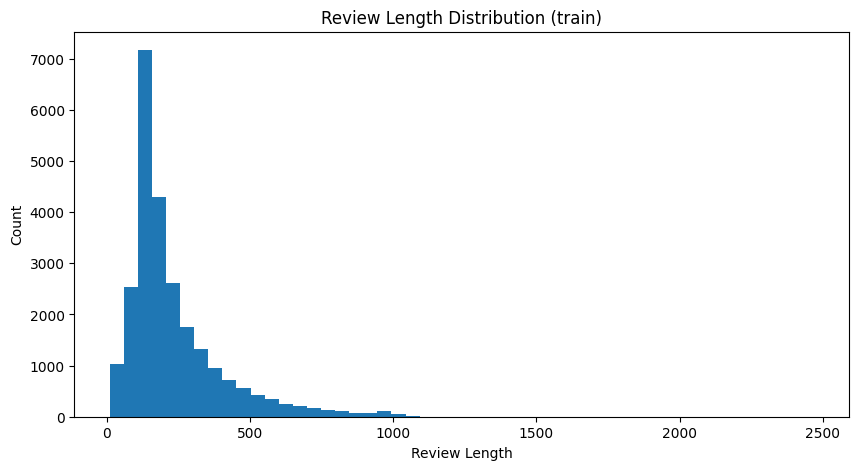

Average review length for train: 233.7872
Max review length for train: 2470
Min review length for train: 10


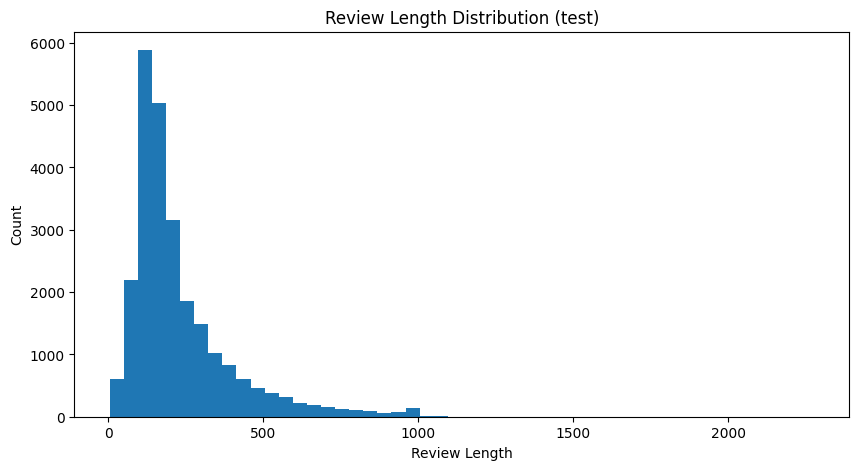

Average review length for test: 228.52668
Max review length for test: 2278
Min review length for test: 4


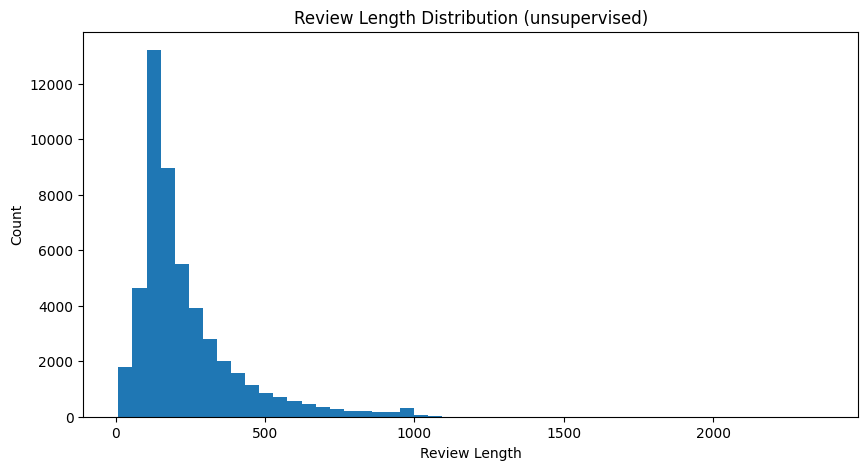

Average review length for unsupervised: 234.43364
Max review length for unsupervised: 2367
Min review length for unsupervised: 9
Label Distribution


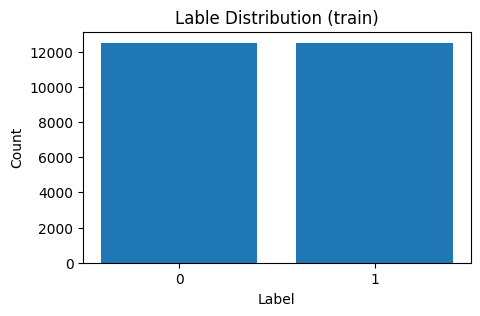

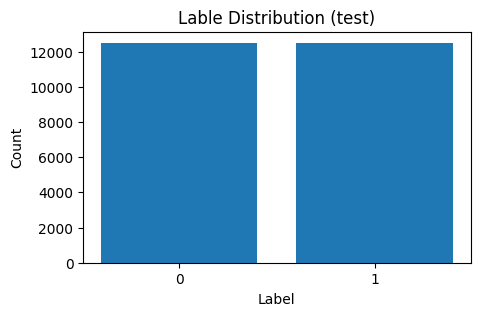

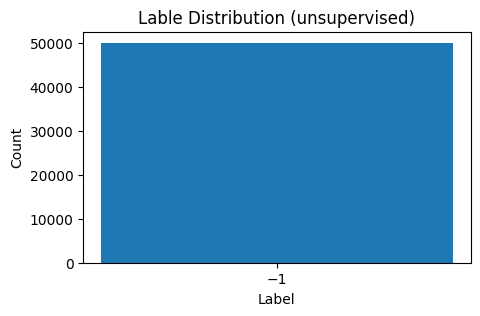

In [ ]:
loader.discover()

## Preprocess data

- Một số câu hỏi cần trả lời trước khi tiền xử lý dữ liệu
  - Dấu câu có tác động gì đến ngữ nghĩa của câu và thể hiện cảm xúc của đoạn đánh giá trong bộ dữ liệu trên. Ngoài dấu câu, cần có phương án kiểm tra và xử lý các icon ký hiệu (:), :D).Trong trường hợp dấu câu là một yếu tố quan trọng và mô hình BERT (hay XLNet) có thể xử lý được, các ký hiệu đặc biệt khác cần được kiểm tra và xử lý như thế nào?
    - Dựa vào một số nguồn ban đầu, ta có thể giữ lại các dấu câu trong câu, đặc biệt là các dấu ngắt câu như dấu chấm và dấu phẩy. Tuy nhiên, cần kiểm tra và loại bỏ các ký hiệu đặc biệt
    - Đường dẫn [source 1](https://stackoverflow.com/questions/62578609/data-preprocessing-for-bert-base-german), [source 2](https://medium.com/data-science/a-complete-guide-to-bert-with-code-9f87602e4a11)
  - Trong các đoạn review, người đánh giá đôi khi sử dụng các từ in hoa (in hoa cả từ hoặc in hoa chữ cái đầu tiên) để đề cập đến các tên riêng như: tên film, tên nhân vật. Pytorch cung cấp mô hình BERT cho cả lowercase và uppercase. Vậy có cần thiết phải thực hiện bước chuyển về các ký tự lowercase không?
    - Trong bộ dữ liệu trên, các từ in hoa thường là tên của bộ film, tên nhân vật. Do đó, chúng không chứa đựng thông tin quan trọng cho việc phân loại

In [ ]:
import re

class Preprocessor:
    def __init__(self, lowercase=True, remove_html=True, remove_numbers=True, remove_special_chars=True):
        self.lowercase = lowercase
        self.remove_html = remove_html
        self.remove_numbers = remove_numbers
        self.remove_special_chars = remove_special_chars

    def preprocess_text(self, text):
        if self.lowercase:
            text = text.lower()

        if self.remove_html:
            text = re.sub(r"<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>", '', text)

        if self.remove_numbers:
            text = re.sub(r"[0-9]", "", text)

        if self.remove_special_chars:
            text = re.sub(r"[^a-zA-Z\s\.\,\-]", "", text)

        text = re.sub(r"\s+", " ", text).strip()

        return text

    def preprocess_dataset(self, dataset):
        processed_dataset = dataset.map(lambda example: {'text': self.preprocess_text(example['text'])})
        return processed_dataset


In [ ]:
preprocessor = Preprocessor(lowercase=True, remove_html=True, remove_numbers=True, remove_special_chars=True)
preprocessed_dataset = preprocessor.preprocess_dataset(loader.dataset)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
preprocessed_dataset['train'][-1]

{'text': 'the story centers around barry mckenzie who must go to england if he wishes to claim his inheritance. being about the grossest aussie shearer ever to set foot outside this great nation of ours there is something of a culture clash and much fun and games ensue. the songs of barry mckenziebarry crocker are highlights.',
 'label': 1}

In [ ]:
train_data, test_data, unsupervised_data = (
    preprocessed_dataset["train"],
    preprocessed_dataset["test"],
    preprocessed_dataset["unsupervised"]
)

## Tokenize data

In [ ]:
import torch
from transformers import BertTokenizer, XLNetTokenizer

- Tùy vào mô hình được sử dụng, ta sử dụng Tokenizer phù hợp.
- Sự khác nhau giữa BertTokenizer và các thư viện tokenizer khác là BertTokeinizer được thiết kế dành riêng cho mô hình Bert. Chúng sử dụng các token như **[CLS]**, **[SEP]**,...; vốn là những token được sử dụng trong BERT.
- Câu hỏi
  - Sự khác nhau giữa BertTokenizer và các thư viện tokenizer khác là gì?
  - Có cần padding, truncate các chuỗi đầu vào hay không.
  - BertTokenizer có thể chuyển đổi từ tokens sang ids. Vậy quá trình Positional Embedding được handle trong mô hình BertForSequenceClassification hay cần được handle trong BertTokenizer.

In [ ]:
# example
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", torch_dtype="auto", device_map="auto")
example_sentence = preprocessed_dataset['train']['text'][0]

encode = bert_tokenizer(example_sentence, max_length=5, truncation=True, padding=True)

print("Example sentence: ", example_sentence)
print("Example ids:", encode['input_ids'])
print("Convert from ids to tokens", bert_tokenizer.convert_ids_to_tokens(encode['input_ids']))

Example sentence:  i rented i am curious-yellow from my video store because of all the controversy that surrounded it when it was first released in . i also heard that at first it was seized by u.s. customs if it ever tried to enter this country, therefore being a fan of films considered controversial i really had to see this for myself.the plot is centered around a young swedish drama student named lena who wants to learn everything she can about life. in particular she wants to focus her attentions to making some sort of documentary on what the average swede thought about certain political issues such as the vietnam war and race issues in the united states. in between asking politicians and ordinary denizens of stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.what kills me about i am curious-yellow is that years ago, this was considered pornographic. really, the sex and nudity scenes are few and far between, even then its not

In [ ]:
class Tokenizer:
    def __init__(self, model_name="bert-base-uncased", max_length=512):
        self.tokenizer = None
        self.model_name = model_name
        self.max_length = max_length

    def load_tokenizer(self):
        """
        Load the tokenizer based on the model name

        Returns:
            The loaded tokenizer
        """
        if self.model_name == "bert-base-uncased":
            self.tokenizer = BertTokenizer.from_pretrained(self.model_name, torch_dtype="auto", device_map="auto")
            return self.tokenizer
        elif self.model_name == "xlnet-base-uncased":
            self.tokenizer = XLNetTokenizer.from_pretrained(self.model_name, torch_dtype="auto", device_map="auto")
            return self.tokenizer
        else:
            print("Không hỗ trợ Tokenizer trên.")


    def tokenize_dataset(self, dataset, text_column="text"):
        """
        Tokenize a dataset

        Args:
            dataset: The dataset to tokenize
            text_column(str): the name of the column containing text data
        Returns:
            The tokenized dataset
        """
        if self.tokenizer == None:
            print("Tokenizer not loaded yet. Call load_tokenizer() first.")
            return
        if text_column not in dataset.column_names:
            print("Column \'text\' is not found in dataset")
            return

        def tokenize_input(input):
            return self.tokenizer(input['text'],
                                max_length = 512,
                                padding = 'max_length',
                                truncation = True)

        dataset = dataset.map(tokenize_input)

        return dataset


In [ ]:
bert_tokenizer = Tokenizer("bert-base-uncased")
print(bert_tokenizer.load_tokenizer())

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


- Khi sử dụng mô hình BertTokenizer, liệu có cần thiết phải sử dụng hai đối tượng khác nhau cho train_data và test data không?
  - Vì lớp BertTokenizer chỉ áp dụng các quy tắc tokenize dữ liệu, không học bất kỳ thông tin gì từ dữ liệu; cho nên có thể sử dụng cùng một đối tượng BertTokenizer cho dữ liệu train và test.
- Các hàm dùng để tokenize bộ dữ liệu đầu vào có hợp lý không? Tại sao thời gian thực thi lại lâu hơn so với các bài lab trước.

In [ ]:
train_data = bert_tokenizer.tokenize_dataset(train_data)
test_data = bert_tokenizer.tokenize_dataset(test_data)
unsupervised_data = bert_tokenizer.tokenize_dataset(unsupervised_data)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

### Lưu dữ liệu sau khi xử lý

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Classroom/Nam3/Semester2/NLP/Lab6"

In [ ]:
import os
from datasets import save_to_disk

# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)

# Save datasets to Google Drive
train_data.save_to_disk(os.path.join(path, "train_data"))
test_data.save_to_disk(os.path.join(path, "test_data"))
unsupervised_data.save_to_disk(os.path.join(path, "unsupervised_data"))

print("Datasets saved to Google Drive.")

ImportError: cannot import name 'save_to_disk' from 'datasets' (/usr/local/lib/python3.11/dist-packages/datasets/__init__.py)

### Load dữ liệu đã được xử lý

In [5]:
from datasets import load_from_disk
import os

# Create the directory if it doesn't exist
os.makedirs(path, exist_ok=True)

# Load saved datasets from Google Drive
train_data = load_from_disk(dataset_path=os.path.join(path, "train_data"))
test_data = load_from_disk(dataset_path=os.path.join(path, "test_data"))
unsupervised_data = load_from_disk(dataset_path=os.path.join(path, "unsupervised_data"))
print("Datasets loaded from Google Drive.")


Datasets loaded from Google Drive.


In [6]:
train_data.set_format(type='torch', columns=['label', 'input_ids', 'attention_mask'])
test_data.set_format(type='torch', columns=['label', 'input_ids', 'attention_mask'])
unsupervised_data.set_format(type='torch', columns=['label', 'input_ids', 'attention_mask'])

## Create a DataLoader

In [7]:
from torch.utils.data import DataLoader
# batch_size 4 cũng ko đuọce
batch_size = 16
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
unsupervised_loader = DataLoader(unsupervised_data, batch_size=batch_size, shuffle=False)

# Select sample for hyperparameters tunning
sample_size = 1000
sample_train_loader = DataLoader(train_data.select(range(sample_size)), batch_size=batch_size, shuffle=True)
sample_test_loader = DataLoader(test_data.select(range(sample_size)), batch_size=batch_size, shuffle=False)

In [ ]:
train_data[0]

ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

## Build or load a model

- Vì tác vụ của mô hình là phân loại đánh giá của người dùng vào nhóm `postitive` hay `negative`, nên tham số num_labels được gán bằng 2.

In [8]:
from transformers import BertForSequenceClassification, XLNetForSequenceClassification

bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
#xlnet_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased",)

In [9]:
# Freeze all layers except the classifier
for param in bert_model.parameters():
    param.requires_grad = False

# Keep only the classification head trainable
for param in bert_model.classifier.parameters():
    param.requires_grad = True

print(f"Trainable parameters: {sum(p.numel() for p in bert_model.parameters() if p.requires_grad)}")

Trainable parameters: 1538


## Create a training workflow

In [10]:
class EarlyStopping:
  def __init__(self, patience:int=5, min_delta:float=0.0):
    self.patience = patience
    self.min_delta = min_delta
    self.counter = 0
    self.min_loss = float('inf')

  def early_stop(self, validation_loss):
    if validation_loss - self.min_loss <= self.min_delta:
      self.counter += 1
      if self.counter > self.patience:
        return True
    else:
      self.counter = 0
      self.min_loss = validation_loss
      return False

In [42]:
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from torch.optim.lr_scheduler import ExponentialLR

learning_rate = 1e-3
gammar = 0.8
patience = 3
min_delta = 0.0

# Optimizer
optimizer = AdamW(bert_model.parameters(), lr=learning_rate)

# Learning rate Scheduler
exponential_lr = ExponentialLR(optimizer, gamma=gammar, verbose=True)

# Loss function
loss = CrossEntropyLoss()

# Early Stopping
early_stopping = EarlyStopping(patience=patience, min_delta=min_delta)

## Set up hyperparameters for training procedure

In [12]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [44]:
bert_model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [45]:
num_epoches = 100
loss_dict = {
    "training_loss": [],
    "validation_loss":[]
}
time_taken = {
    "total": float(0),
    "training_time": [],
    "validation_time": []
}

start_training = datetime.now()
for epoch in range(num_epoches):
  print(f"Epoch: {epoch} - Learning rate {exponential_lr.get_lr()}")

  # Put model in train mode
  bert_model.train()
  batch_training_loss = 0
  t0_training = datetime.now()
  for batch in train_loader:
      batch_input_ids = batch['input_ids'].to(device)  # Indices of input sequence tokens in the vocabulary.
      batch_attention_mask = batch['attention_mask'].to(device) # Mask to avoid performing attention on padding token indices.
      batch_label = batch['label'].to(device)

      bert_model.zero_grad()

      loss, logits = bert_model.forward(input_ids=batch_input_ids,
                         attention_mask=batch_attention_mask,
                         labels=batch_label,
                        return_dict=False)
      batch_training_loss += loss
      loss.backward()
      torch.nn.utils.clip_grad_norm_(bert_model.parameters(), 1.0)
      optimizer.step()

  # Calculate training loss
  average_train_loss = batch_training_loss / len(sample_train_loader)
  loss_dict["training_loss"].append(average_train_loss)
  print(f"\tTrain Loss: {average_train_loss}")

  # Change learning rate
  exponential_lr.step()

  # Calculate training time
  time_taken['training_time'].append(datetime.now() - t0_training)
  print(f"\tTraining Time Taken: {time_taken['training_time'][epoch]}")

  # Test on validation dataset
  bert_model.eval()
  batch_val_loss = 0
  t0_validation = datetime.now()
  for batch in test_loader:
      batch_input_ids = batch['input_ids'].to(device)  # Indices of input sequence tokens in the vocabulary.
      batch_attention_mask = batch['attention_mask'].to(device) # Mask to avoid performing attention on padding token indices.
      batch_label = batch['label'].to(device)

      with torch.no_grad():
        loss, logits = bert_model(input_ids=batch_input_ids,
                          attention_mask=batch_attention_mask,
                          labels=batch_label, return_dict=False)
      batch_val_loss += loss

  # Calculate validation loss
  average_val_loss = batch_val_loss / len(sample_test_loader)
  loss_dict['validation_loss'].append(average_val_loss)
  print(f"\tValidation Loss: {average_val_loss}")

  # Calculate validation time
  time_taken['validation_time'].append(datetime.now() - t0_validation)
  print(f"\tTraining Time Taken: {time_taken['validation_time'][epoch]}")

  # Early Stopping
  if early_stopping.early_stop(average_train_loss):
    print("Early Stopping!")
    break

time_taken["total"] = datetime.now() - start_training

Epoch: 0 - Learning rate [0.001]
	Train Loss: 15.833507537841797
	Training Time Taken: 0:11:49.910326
	Validation Loss: 12.320027351379395
	Training Time Taken: 0:11:32.504703
Epoch: 1 - Learning rate [0.00025]
	Train Loss: 11.908768653869629
	Training Time Taken: 0:11:49.175183


KeyboardInterrupt: 

Save mô hình
Sử dụng class để viết

Sử dụng full dữ liệu \
Epoch: 0 - Learning rate [0.001]
	Train Loss: 15.833507537841797
	Training Time Taken: 0:11:49.910326

Epoch: 0 - Learning rate [0.001]\t
	Train Loss: 15.833507537841797
	Training Time Taken: 0:11:49.910326
	Validation Loss: 12.320027351379395
	Training Time Taken: 0:11:32.504703
Epoch: 1 - Learning rate [0.00025]

Epoch: 0 - Learning rate [0.001]
	Train Loss: 15.833507537841797
	Training Time Taken: 0:11:49.910326
	Validation Loss: 12.320027351379395
	Training Time Taken: 0:11:32.504703
Epoch: 1 - Learning rate [0.00025]
	Train Loss: 11.908768653869629
	Training Time Taken: 0:11:49.175183

- Một số lý do khiến mô hình train lâu
  - Batch size nhỏ
  - Chuyển các batch sang GPU lâu?
  